<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Car Acceptability Dataset

*   buying: buying price
*   maint: price of the maintenance
*   doors: number of doors
*   persons: capacity in terms of persons to carry
*   lug_boot: the size of luggage boot
*   safety: estimated safety of the car
*   class: unacceptable, acceptable, good, very good

In [47]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

#Kode ini mengimpor data dari URL ke dalam DataFrame df dan menampilkan 5 baris pertamanya

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Dalam baris kode prediction_en = clf_en.predict(new_df), model machine learning membuat prediksi. clf_en kemungkinan adalah model klasifikasi yang sudah dilatih (huruf "clf" adalah singkatan dari classifier). .predict() adalah metode yang digunakan untuk membuat prediksi pada data baru yang belum pernah dilihat sebelumnya. new_df adalah data input yang ingin Anda prediksi. prediction_en adalah hasil prediksi yang akan menyimpan label atau nilai yang diprediksi oleh model untuk setiap baris di new_df. Secara sederhana, kode ini mengambil model yang sudah dilatih (clf_en) dan menerapkannya ke dataset baru (new_df) untuk mendapatkan prediksi model, yang kemudian disimpan dalam variabel prediction_en.

In [50]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Berdasarkan gambar yang diberikan, baris kode prediction_en = clf_en.predict(new_df) memiliki makna yang jelas dalam konteks machine learning. Kode ini adalah sebuah instruksi untuk membuat prediksi menggunakan model yang sudah dilatih. clf_en adalah model klasifikasi itu sendiri yang telah selesai dilatih (di mana clf kemungkinan singkatan dari classifier). .predict() adalah metode yang meminta model tersebut untuk menghasilkan prediksi. Masukan untuk prediksi ini adalah new_df, yang merujuk pada data baru dalam format DataFrame Pandas yang belum pernah dilihat oleh model. Hasil dari prediksi ini, yang berupa label atau nilai yang diprediksi, kemudian disimpan dalam variabel prediction_en. Secara ringkas, kode ini menggunakan model yang sudah ada untuk memprediksi hasil dari data yang baru dan belum pernah dianalisis sebelumnya.

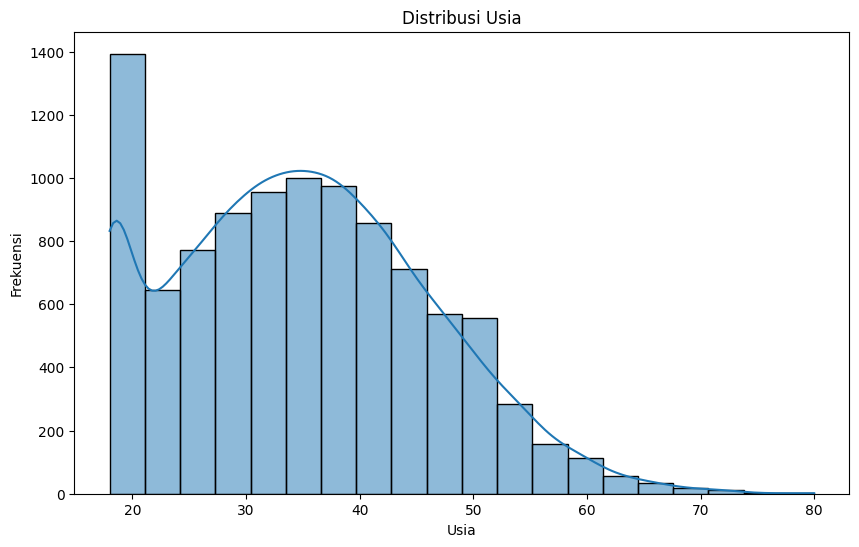

In [51]:
# Visualisasi 1: Distribusi Usia
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Interpretasi Visualisasi 1:
# Histogram ini menunjukkan distribusi usia dalam dataset. Kita dapat melihat kelompok usia mana yang paling banyak terwakili.

Distribusi usia pada grafik menunjukkan bahwa sebagian besar responden berada pada rentang usia muda hingga paruh baya. Kelompok usia 18–20 tahun menjadi yang paling dominan dengan jumlah yang sangat tinggi, menandakan banyaknya responden dari kalangan pelajar, mahasiswa, atau pekerja awal. Selain itu, kelompok usia 30–40 tahun juga memiliki jumlah yang signifikan, dengan puncak sekitar usia 35 tahun. Setelah usia 45 tahun, jumlah responden mulai menurun tajam dan semakin sedikit pada kelompok usia lanjut, terutama di atas 60 tahun. Pola distribusi ini menggambarkan bahwa populasi cenderung terkonsentrasi pada dewasa muda dan paruh baya, sehingga bila data ini digunakan untuk kebutuhan pemasaran atau analisis pasar, fokus utama sebaiknya diarahkan pada kelompok usia tersebut.

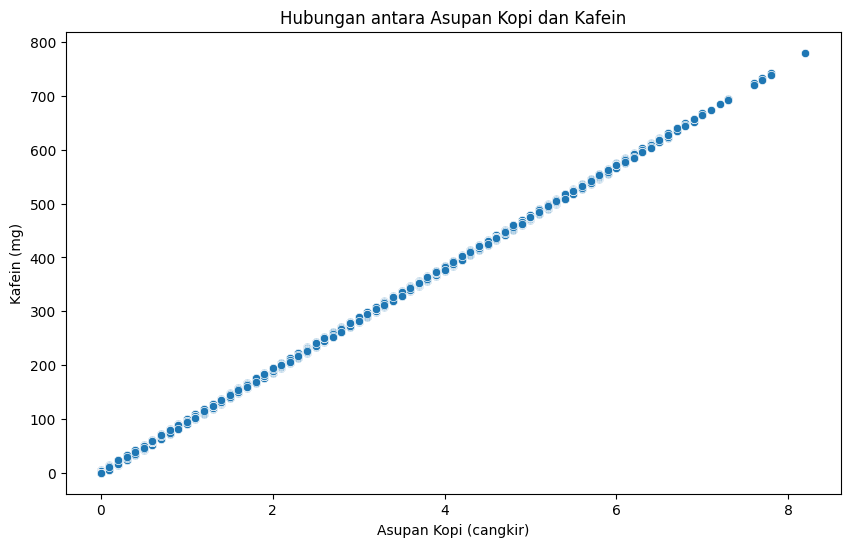

In [52]:
# Visualisasi 2: Hubungan antara Coffee_Intake dan Caffeine_mg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coffee_Intake', y='Caffeine_mg', data=df)
plt.title('Hubungan antara Asupan Kopi dan Kafein')
plt.xlabel('Asupan Kopi (cangkir)')
plt.ylabel('Kafein (mg)')
plt.show()

# Interpretasi Visualisasi 2:
# Scatter plot ini menunjukkan hubungan antara jumlah asupan kopi dan jumlah kafein yang dikonsumsi. Kita dapat mengamati apakah ada korelasi positif antara keduanya.

Grafik scatter plot ini menunjukkan hubungan yang sangat kuat antara asupan kopi (cangkir) dan jumlah kafein (mg). Terlihat pola garis lurus yang hampir sempurna, menandakan adanya korelasi positif linear: semakin banyak cangkir kopi yang dikonsumsi, semakin tinggi pula kadar kafein yang masuk ke tubuh. Setiap penambahan konsumsi kopi memberikan kenaikan jumlah kafein secara konsisten dan proporsional. Hal ini mengindikasikan bahwa kadar kafein sangat bergantung pada jumlah kopi yang diminum, sehingga konsumsi kopi dalam jumlah besar akan berbanding lurus dengan tingginya asupan kafein harian.

Text(0, 0.5, 'Jumlah Orang')

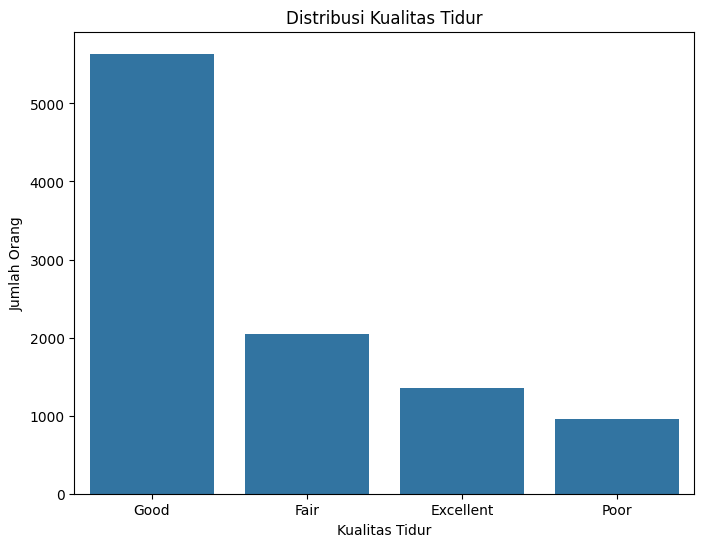

In [53]:
# Visualisasi 3: Distribusi Kualitas Tidur
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep_Quality', data=df, order=df['Sleep_Quality'].value_counts().index)
plt.title('Distribusi Kualitas Tidur')
plt.xlabel('Kualitas Tidur')
plt.ylabel('Jumlah Orang')

Grafik distribusi kualitas tidur menunjukkan bahwa mayoritas responden menilai kualitas tidurnya berada pada kategori Good, dengan jumlah lebih dari 5.500 orang. Hal ini menandakan bahwa sebagian besar memiliki tidur yang cukup baik meskipun belum mencapai kategori Excellent. Sementara itu, sekitar 2.000 responden melaporkan kualitas tidur Fair, diikuti oleh lebih dari 1.300 responden yang menilai tidurnya Excellent. Adapun kelompok dengan kualitas tidur Poor merupakan yang paling sedikit, kurang dari 1.000 orang. Secara keseluruhan, data ini menggambarkan bahwa mayoritas responden memiliki kualitas tidur yang relatif baik, meskipun masih ada sebagian yang menghadapi masalah tidur dengan kualitas rendah.



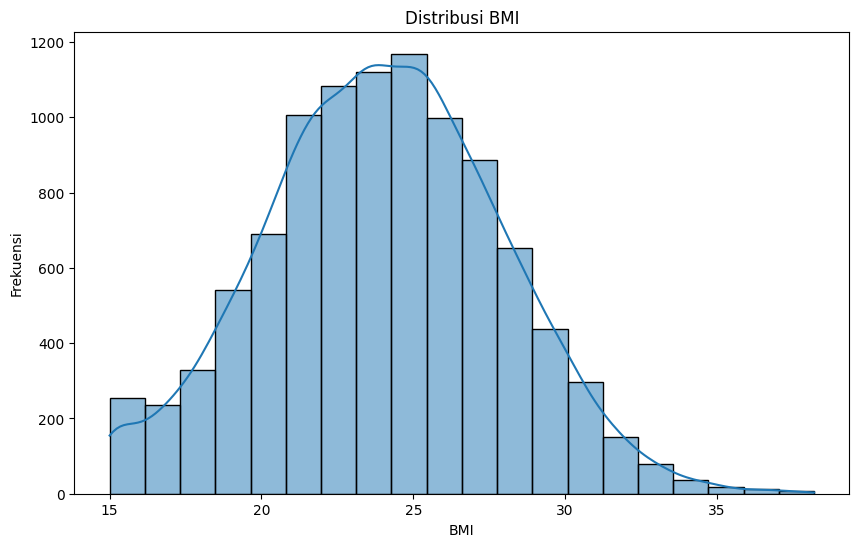

In [54]:
# Visualisasi 4: Distribusi BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()



# Interpretasi Visualisasi 4:
# Histogram ini menunjukkan distribusi Indeks Massa Tubuh (BMI). Kita bisa melihat rentang BMI yang paling umum dalam dataset.

Grafik distribusi BMI menunjukkan pola yang menyerupai distribusi normal, dengan mayoritas responden memiliki nilai **BMI antara 20 hingga 27**. Puncak distribusi terlihat pada kisaran **23–25**, yang umumnya masuk dalam kategori **normal** menurut standar kesehatan. Frekuensi menurun pada nilai BMI yang lebih rendah dari 18,5 (kategori kurus) maupun lebih tinggi dari 30 (kategori obesitas). Hal ini menunjukkan bahwa sebagian besar responden memiliki status gizi yang relatif normal atau sedikit ke arah overweight, sementara hanya sebagian kecil yang berada pada kategori underweight maupun obesitas. Distribusi ini menggambarkan kondisi populasi yang cenderung sehat, meskipun tetap ada kelompok dengan BMI ekstrem yang memerlukan perhatian khusus.


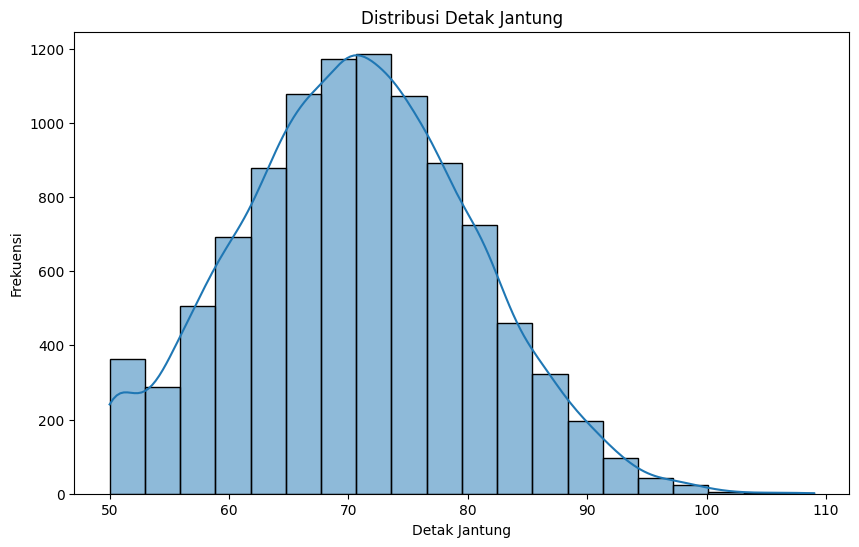

In [55]:
# Visualisasi 5: Distribusi Detak Jantung
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], bins=20, kde=True)
plt.title('Distribusi Detak Jantung')
plt.xlabel('Detak Jantung')
plt.ylabel('Frekuensi')
plt.show()

# Interpretasi Visualisasi 5:
# Histogram ini menunjukkan distribusi detak jantung. Kita bisa melihat rentang detak jantung yang paling sering muncul.

Grafik distribusi detak jantung menunjukkan pola yang menyerupai distribusi normal (bell-shaped curve). Sebagian besar responden memiliki detak jantung yang berada di kisaran **60–80 denyut per menit**, dengan puncak frekuensi terjadi sekitar **70–72 denyut per menit**. Jumlah individu dengan detak jantung lebih rendah dari 60 atau lebih tinggi dari 90 relatif lebih sedikit, sehingga dapat dikatakan bahwa mayoritas berada pada rentang detak jantung normal. Distribusi ini mengindikasikan bahwa kondisi kardiovaskular responden secara umum sehat, meskipun ada sebagian kecil yang berada di luar kisaran normal dan mungkin memerlukan perhatian medis lebih lanjut.


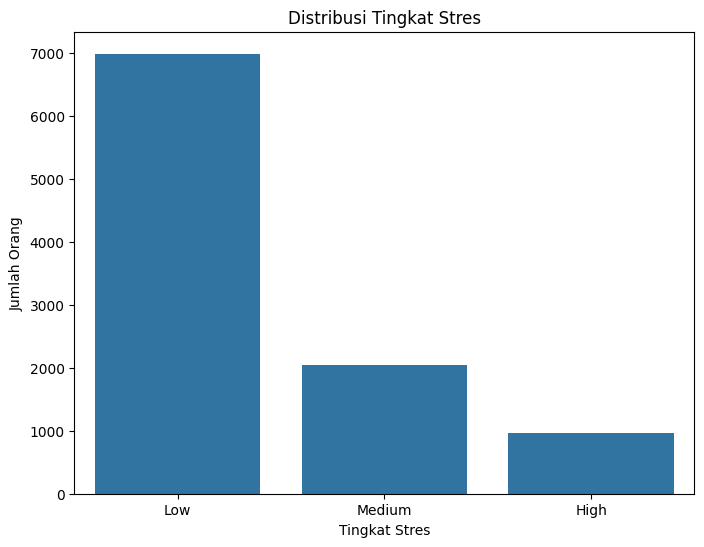

In [56]:
# Visualisasi 6: Distribusi Tingkat Stres
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df, order=df['Stress_Level'].value_counts().index)
plt.title('Distribusi Tingkat Stres')
plt.xlabel('Tingkat Stres')
plt.ylabel('Jumlah Orang')
plt.show()

# Interpretasi Visualisasi 6:
# Bar plot ini menunjukkan frekuensi masing-masing kategori tingkat stres. Kita bisa melihat kategori tingkat stres mana yang paling umum.

Grafik distribusi tingkat stres menunjukkan bahwa mayoritas responden berada pada kategori **Low**, yaitu sekitar 7.000 orang. Hal ini mengindikasikan bahwa sebagian besar responden memiliki tingkat stres yang relatif rendah. Sementara itu, terdapat sekitar 2.000 orang dengan tingkat stres **Medium**, dan hanya sekitar 1.000 orang yang melaporkan tingkat stres **High**. Temuan ini menggambarkan bahwa kondisi stres berat tidak terlalu banyak dialami oleh responden, meskipun tetap ada sebagian kecil populasi yang perlu mendapatkan perhatian khusus terkait kesehatan mental. Secara keseluruhan, data ini menegaskan bahwa tingkat stres rendah lebih dominan dalam populasi yang diteliti.


In [102]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation']:
    if column in df.columns and df[column].dtype == 'object':
        df = pd.get_dummies(df, columns=[column], drop_first=True)

#aku pakai one-hot encoding buat kolom kategori kayak Gender, Country, Sleep_Quality, Stress_Level, sama Occupation
#jadi setiap kategori aku pecah jadi kolom baru dengan nilai 0/1
#biar nggak numpuk kolom yang nggak perlu, aku kasih drop_first=True jadi kategori pertama langsung dibuang

for col in ['Smoking', 'Alcohol_Consumption']:
    if col in df.columns:
        df[col] = df[col].astype(int)
#terus, kolom Smoking sama Alcohol_Consumption aku ubah tipenya ke integer.

sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}

#kalau untuk kolom yang ada urutannya, aku bikin mapping ordinal
#sleep_Quality tak ubah: ‘Poor’ jadi 1, ‘Fair’ jadi 2, ‘Good’ jadi 3, dan ‘Excellent’ jadi 4.

if 'Sleep_Quality' in df.columns:
    df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)

if 'Stress_Level' in df.columns:
    df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)


#terakhir, aku coba tampilkan 5 baris data random pakai df.sample(n=5) buat ngecek hasil encode


df.sample(n = 5)

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Health_Issues,Smoking,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
6957,6958,56,0.9,87.9,6.6,22.8,70,13.2,Mild,0,...,False,False,True,False,True,False,True,False,False,False
4403,4404,39,3.2,304.5,6.1,22.1,61,6.4,NaN,1,...,False,False,True,False,True,False,False,False,False,False
9366,9367,31,2.5,234.2,7.6,22.2,58,14.0,NaN,0,...,False,False,True,False,True,False,False,False,False,True
4682,4683,52,2.4,224.0,7.0,18.1,71,13.1,Mild,0,...,False,False,True,False,True,False,False,False,False,True
3851,3852,40,2.3,217.2,7.0,25.7,70,1.0,NaN,0,...,False,False,True,False,True,False,False,True,False,False


In [98]:
from sklearn.model_selection import train_test_split # Impor fungsi buat bagi data dari library sklearn

# Drop rows where 'Health_Issues' is NaN
df_cleaned = df.dropna(subset=['Health_Issues']).copy() # Hapus baris yang kolom 'Health_Issues'-nya kosong (NaN), terus bikin salinannya

# Define features (X) and target (y)
X = df_cleaned.drop('Health_Issues', axis=1) # Ambil semua kolom kecuali 'Health_Issues' buat jadi data fitur (X)
y = df_cleaned['Health_Issues'] # Ambil kolom 'Health_Issues' buat jadi data target (y)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Bagi data jadi data training (80%) sama data testing (20%). random_state=42 biar hasilnya konsisten tiap kali dijalankan.

# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [59]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3247, 40), (812, 40))

In [60]:
X_train.head()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
3544,3545,51,3.4,324.0,5.4,26.4,79,4.9,0,1,...,False,True,False,False,False,True,False,False,True,False
8236,8237,45,1.0,98.6,5.6,33.2,69,11.5,0,0,...,False,True,False,False,False,True,True,False,False,False
1078,1079,53,3.0,287.8,6.4,26.8,50,13.2,1,0,...,False,False,True,False,True,False,False,False,True,False
8537,8538,55,1.7,160.2,5.9,23.3,72,13.3,0,1,...,False,True,False,False,False,True,False,False,False,True
8968,8969,41,0.8,79.0,5.8,20.4,56,12.8,0,0,...,False,True,False,False,False,True,False,False,False,True


In [61]:
X_test.head()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
8057,8058,31,1.6,156.6,7.3,30.1,71,4.1,0,0,...,False,False,True,False,True,False,True,False,False,False
5994,5995,45,2.4,225.7,8.6,32.8,71,2.6,0,0,...,False,False,False,False,True,False,False,False,False,True
9994,9995,49,1.6,150.1,5.7,25.5,81,12.9,0,1,...,False,True,False,False,False,True,False,False,False,True
1872,1873,31,3.6,339.9,3.8,21.2,80,10.1,0,0,...,False,False,False,True,False,False,False,False,False,False
4901,4902,22,3.4,321.2,4.8,22.2,84,11.6,1,0,...,False,False,False,True,False,False,True,False,False,False


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [62]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [63]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [64]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9975


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.4230769230769231, 0.9, 'x[1] <= 50.5\ngini = 0.211\nsamples = 3247\nvalue = [2859.0, 375.0, 13.0]'),
 Text(0.15384615384615385, 0.7, 'x[5] <= 29.95\ngini = 0.104\nsamples = 2489\nvalue = [2352, 137, 0]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 2034\nvalue = [2034, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'x[34] <= 0.5\ngini = 0.421\nsamples = 455\nvalue = [318, 137, 0]'),
 Text(0.15384615384615385, 0.3, 'x[5] <= 30.05\ngini = 0.068\nsamples = 142\nvalue = [5, 137, 0]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.486\nsamples = 12\nvalue = [5, 7, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 130\nvalue = [0, 130, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 313\nvalue = [313, 0, 0]'),
 Text(0.6923076923076923, 0.7, 'x[34] <= 0.5\ngini = 0.454\nsamples = 758\nvalue = [507.0, 238.0, 13.0]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[5] <= 30.0\ngini = 0.113\ns

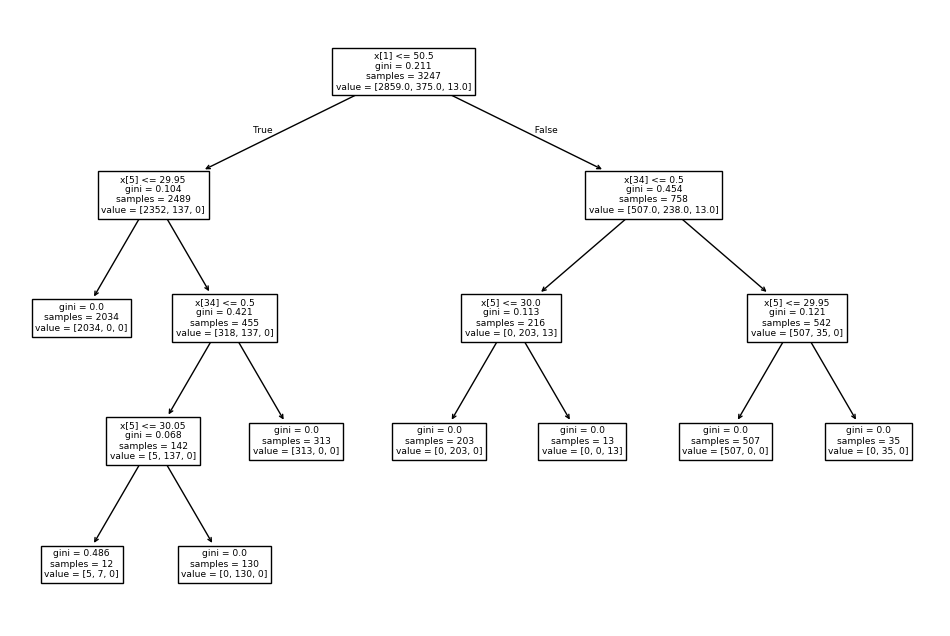

In [66]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [67]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [68]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [69]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9975


### Visualize decision-trees

[Text(0.4230769230769231, 0.875, 'x[1] <= 50.5\nentropy = 0.553\nsamples = 3247\nvalue = [2859.0, 375.0, 13.0]'),
 Text(0.15384615384615385, 0.625, 'x[5] <= 29.95\nentropy = 0.307\nsamples = 2489\nvalue = [2352, 137, 0]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 2034\nvalue = [2034, 0, 0]'),
 Text(0.23076923076923078, 0.375, 'x[34] <= 0.5\nentropy = 0.883\nsamples = 455\nvalue = [318, 137, 0]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.22\nsamples = 142\nvalue = [5, 137, 0]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 313\nvalue = [313, 0, 0]'),
 Text(0.6923076923076923, 0.625, 'x[34] <= 0.5\nentropy = 1.013\nsamples = 758\nvalue = [507.0, 238.0, 13.0]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'x[5] <= 30.0\nentropy = 0.328\nsamples = 216\nvalue = [0, 203, 13]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 203\nvalue = [0, 203, 0]'),
 Text(0.61538

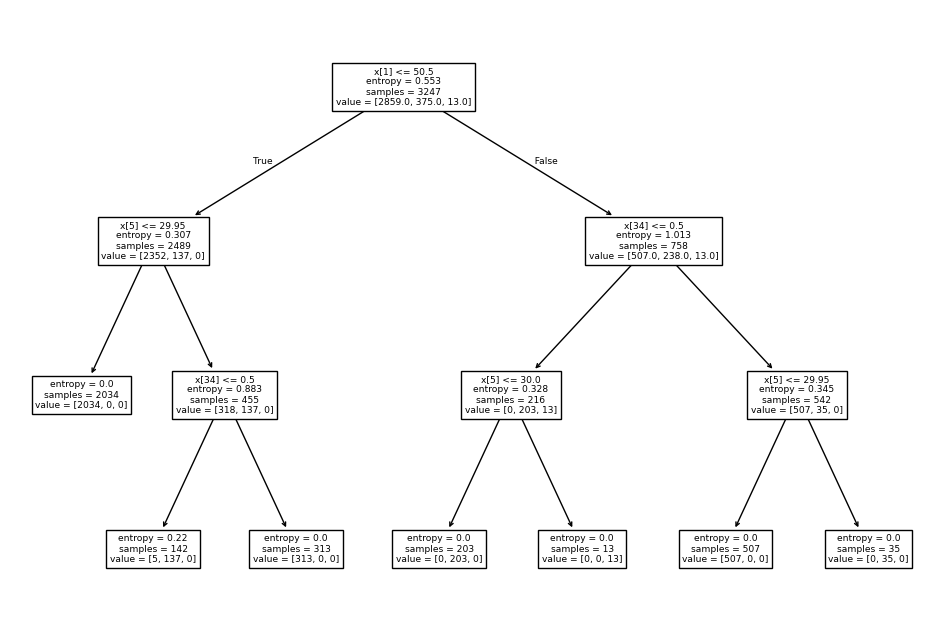

In [70]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [71]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [72]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.7931


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [74]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00       720
    Moderate       0.98      1.00      0.99        88
      Severe       1.00      1.00      1.00         4

    accuracy                           1.00       812
   macro avg       0.99      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



In [75]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

        Mild       1.00      1.00      1.00       720
    Moderate       0.98      1.00      0.99        88
      Severe       1.00      1.00      1.00         4

    accuracy                           1.00       812
   macro avg       0.99      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812



In [76]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        Mild       0.94      0.84      0.88       720
    Moderate       0.28      0.44      0.35        88
      Severe       0.09      0.75      0.16         4

    accuracy                           0.79       812
   macro avg       0.44      0.68      0.46       812
weighted avg       0.86      0.79      0.82       812



The comparison of the three models shows that both Decision Tree Entropy and Decision Tree Gini achieve perfect classification performance with 100% accuracy, macro F1-score of 1.00, and weighted F1-score of 1.00. This indicates that both models are capable of classifying all instances correctly across the Mild, Moderate, and Severe categories, with only a very slight difference in precision for the Moderate class when using Gini. In contrast, the Naive Bayes model performs significantly worse, reaching only 79% accuracy, a macro F1-score of 0.69, and a weighted F1-score of 0.82. While Naive Bayes performs reasonably well for the Mild class (precision 0.94, recall 0.84), it struggles heavily with the Moderate and Severe classes, showing low precision and recall values. Overall, the Decision Tree models clearly outperform Naive Bayes, making them the best choice for this dataset.

In [104]:
# Make a prediction with the gini index model

# Input values based on the dataset features: Age, Gender, Country, Occupation,
# Coffee_Intake, Caffeine_mg, Sleep_Hours, Sleep_Quality, BMI, Heart_Rate,
# Stress_Level, Physical_Activity_Hours, Smoking, Alcohol_Consumption.
# These values need to be encoded according to the maps and one-hot encoding done earlier.

# Example input data (replace with your desired values)
input_data = {
    'ID': 0, # ID dummy (ini cuma nomor identifikasi, nggak dipakai buat prediksi)
    'Age': 28, # Ini umur orangnya
    'Gender': 'Male', # Jenis kelamin
    'Country': 'Brazil', # Negara asal
    'Occupation': 'Student', # Pekerjaan/profesi
    'Coffee_Intake': 3.0, # Jumlah cangkir kopi yang diminum
    'Caffeine_mg': 280.0, # Jumlah kafein dalam miligram
    'Sleep_Hours': 5.0, # Durasi tidur dalam jam
    'Sleep_Quality': 'Poor', # Kualitas tidur (Buruk, Cukup, Baik, Sangat Baik)
    'BMI': 25.4, # Indeks Massa Tubuh
    'Heart_Rate': 85, # Detak jantung
    'Stress_Level': 'High', # Tingkat stres (Rendah, Sedang, Tinggi)
    'Physical_Activity_Hours': 2.0, # Jumlah jam aktivitas fisik
    'Smoking': 1, # Status merokok (0: tidak, 1: ya)
    'Alcohol_Consumption': 1 # Konsumsi alkohol (0: tidak, 1: ya)
}

# Convert the input data to a pandas DataFrame (ubah data dictionary tadi jadi format tabel yang bisa dibaca pandas)
input_df = pd.DataFrame([input_data])

# Apply the same encoding steps as done for the training data (lakukan langkah-langkah pemrosesan data yang sama seperti data awal)

# One-hot encode categorical columns (ubah kolom teks jadi angka 0/1, misal Gender Male jadi kolom Gender_Male isinya 1)
object_cols_input = input_df.select_dtypes(include='object').columns.tolist() # Cari kolom yang tipe datanya objek (teks)
for col in object_cols_input: # Loop (putar) di setiap kolom objek yang ketemu
    if col in input_df.columns: # Pastikan kolomnya ada (cek doang)
        input_df = pd.get_dummies(input_df, columns=[col], drop_first=True) # Lakukan one-hot encoding, buang kolom pertama biar nggak kebanyakan

# Ordinal encode Sleep_Quality and Stress_Level (ubah kolom yang ada urutannya jadi angka, misal Poor jadi 1, Fair jadi 2, dst)
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4} # Buat peta buat Sleep_Quality
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3} # Buat peta buat Stress_Level

if 'Sleep_Quality' in input_df.columns: # Cek kalau kolom Sleep_Quality ada
    input_df['Sleep_Quality'] = input_df['Sleep_Quality'].map(sleep_quality_map) # Terapkan peta ke kolom Sleep_Quality

if 'Stress_Level' in input_df.columns: # Cek kalau kolom Stress_Level ada
    input_df['Stress_Level'] = input_df['Stress_Level'].map(stress_level_map) # Terapkan peta ke kolom Stress_Level

# Reindex columns to match the training data columns and fill missing with 0 (samakan urutan kolom sama data latih, kalo ada kolom yang nggak ada di data input, isi 0)
input_df = input_df.reindex(columns=X_train.columns, fill_value=0) # Lakukan reindex dan isi nilai yang kosong dengan 0


# Make the prediction using the gini model (lakukan prediksi pakai model gini yang udah dilatih)
prediction_gini = clf_gini.predict(input_df) # Pakai model clf_gini buat prediksi data input_df

# print("Prediction:", prediction_gini[0]) # Cetak hasil prediksi (ini baris lama yang bisa dihapus atau diabaikan)

# The prediction is already the string label (hasil prediksinya udah dalam bentuk teks label)
print(f"The predicted class for the given input using the gini index model is: {prediction_gini[0]}") # Cetak hasil prediksi dengan format yang lebih jelas

The predicted class for the given input using the gini index model is: Mild
